# Sexual Harassment Detection using Natural Language Processing

## Loading Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import re
import nltk
import string
import seaborn as sns
from string import punctuation
from collections import defaultdict
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics 
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential, layers, regularizers, constraints
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import itertools
import collections

In [2]:
df = pd.read_csv('hate_speech.csv',error_bad_lines=False)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


## Exploratory Data Analysis (EDA)

In [3]:
df2= df.copy()

### Analysis Null Values

In [4]:
def missing_values (x):
    missing_values = x.isnull().sum()
    return (missing_values)

def percentage_nulls (x):
    percentage_nulls = round(x.isnull().sum() * 100 / len(x),2)
    return (percentage_nulls)

In [5]:
missing_values(df2)

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
percentage_nulls(df2)

Unnamed: 0            0.0
count                 0.0
hate_speech           0.0
offensive_language    0.0
neither               0.0
class                 0.0
tweet                 0.0
dtype: float64

### Word Count

In [7]:
def word_count(df2):
    # Split the string into words 
    words = df2.split()
    # Return length of words list
    return len(words)

In [8]:
df2['word_count'] = df2['tweet'].apply(word_count)

### Unique word count 

In [9]:
df2['unique_word_count'] = df2['tweet'].apply(lambda x: len(set(str(x).split())))

### Average word density 

In [10]:
def avg_word_desnsity(df2):
    # Split the string into words
    words = df2.split()
    # Compute length of each word
    lenght_words = [len(w) for w in words]
    # Compute average word length
    avg_word_length = round(sum(lenght_words)/len(words))
    # Return average word length
    return (avg_word_length)

In [11]:
df2['avg_word_length'] = df2['tweet'].apply(avg_word_desnsity)

### Stop Words Count

In [12]:
df2['stop_word_count'] = df2['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

### Character Count

In [13]:
def char_count(x):
    char_num = len(x)
    return (char_num)

In [14]:
df2['char_count'] = df2['tweet'].apply(char_count)

### Punctuation Count

In [15]:
df2['punct_count'] = df2['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

### Hashtag Count

In [16]:
df2['hashtag_count'] = df2['tweet'].apply(lambda x: len([sym for sym in str(x) if sym == '#']))

### Mentions Count

In [17]:
df2['mention_count'] = df2['tweet'].apply(lambda x: len([sym for sym in str(x) if sym == '@']))

### URL Count

In [18]:
df2['url_count'] =df2['tweet'].apply(lambda x: len([url for url in str(x).lower().split() if 'http' in url or 'https' in url]))

In [19]:
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,word_count,unique_word_count,avg_word_length,stop_word_count,char_count,punct_count,hashtag_count,mention_count,url_count
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,23,5,12,140,12,0,1,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,16,4,3,85,12,0,1,0
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,19,5,9,120,15,0,2,0
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,9,6,3,62,15,0,2,0
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,23,4,13,137,18,1,1,0


### Most common Words

In [20]:
words_in_tweet = [tweet.lower().split() for tweet in df2.tweet]

In [21]:
words_in_tweet[:2]

[['!!!',
  'rt',
  '@mayasolovely:',
  'as',
  'a',
  'woman',
  'you',
  "shouldn't",
  'complain',
  'about',
  'cleaning',
  'up',
  'your',
  'house.',
  '&amp;',
  'as',
  'a',
  'man',
  'you',
  'should',
  'always',
  'take',
  'the',
  'trash',
  'out...'],
 ['!!!!!',
  'rt',
  '@mleew17:',
  'boy',
  'dats',
  'cold...tyga',
  'dwn',
  'bad',
  'for',
  'cuffin',
  'dat',
  'hoe',
  'in',
  'the',
  '1st',
  'place!!']]

In [22]:
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(25)

[('a', 9413),
 ('rt', 7567),
 ('i', 7342),
 ('the', 7136),
 ('bitch', 6749),
 ('you', 5673),
 ('to', 5296),
 ('and', 3932),
 ('my', 3543),
 ('that', 3397),
 ('in', 3003),
 ('is', 2852),
 ('bitches', 2677),
 ('like', 2674),
 ('of', 2539),
 ('on', 2452),
 ('be', 2351),
 ('me', 2312),
 ('for', 2087),
 ('this', 2069),
 ('hoes', 1977),
 ('with', 1816),
 ('pussy', 1731),
 ('it', 1595),
 ("i'm", 1552)]

In [23]:
clean_tweets = pd.DataFrame(counts.most_common(50),
                             columns=['words', 'count'])

clean_tweets.head(10)

,words,count
0,a,9413
1,rt,7567
2,i,7342
3,the,7136
4,bitch,6749
5,you,5673
6,to,5296
7,and,3932
8,my,3543
9,that,3397


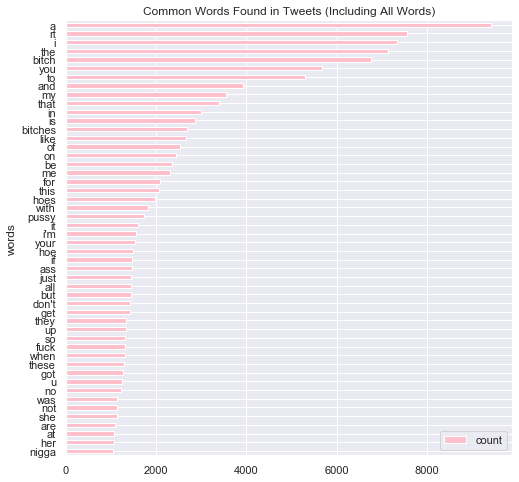

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Target Variable Analysis

## Graphical Analysis

class =  0 - hate speech 1 - offensive language 2 - neither

In [25]:
meta_features= ['word_count','unique_word_count','avg_word_length', 'stop_word_count',
                'char_count', 'punct_count', 'hashtag_count', 'mention_count', 'url_count']

hate_speech = df2['class'] == 0
offensive_language = df2['class'] == 1
neither = df2['class'] == 2

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


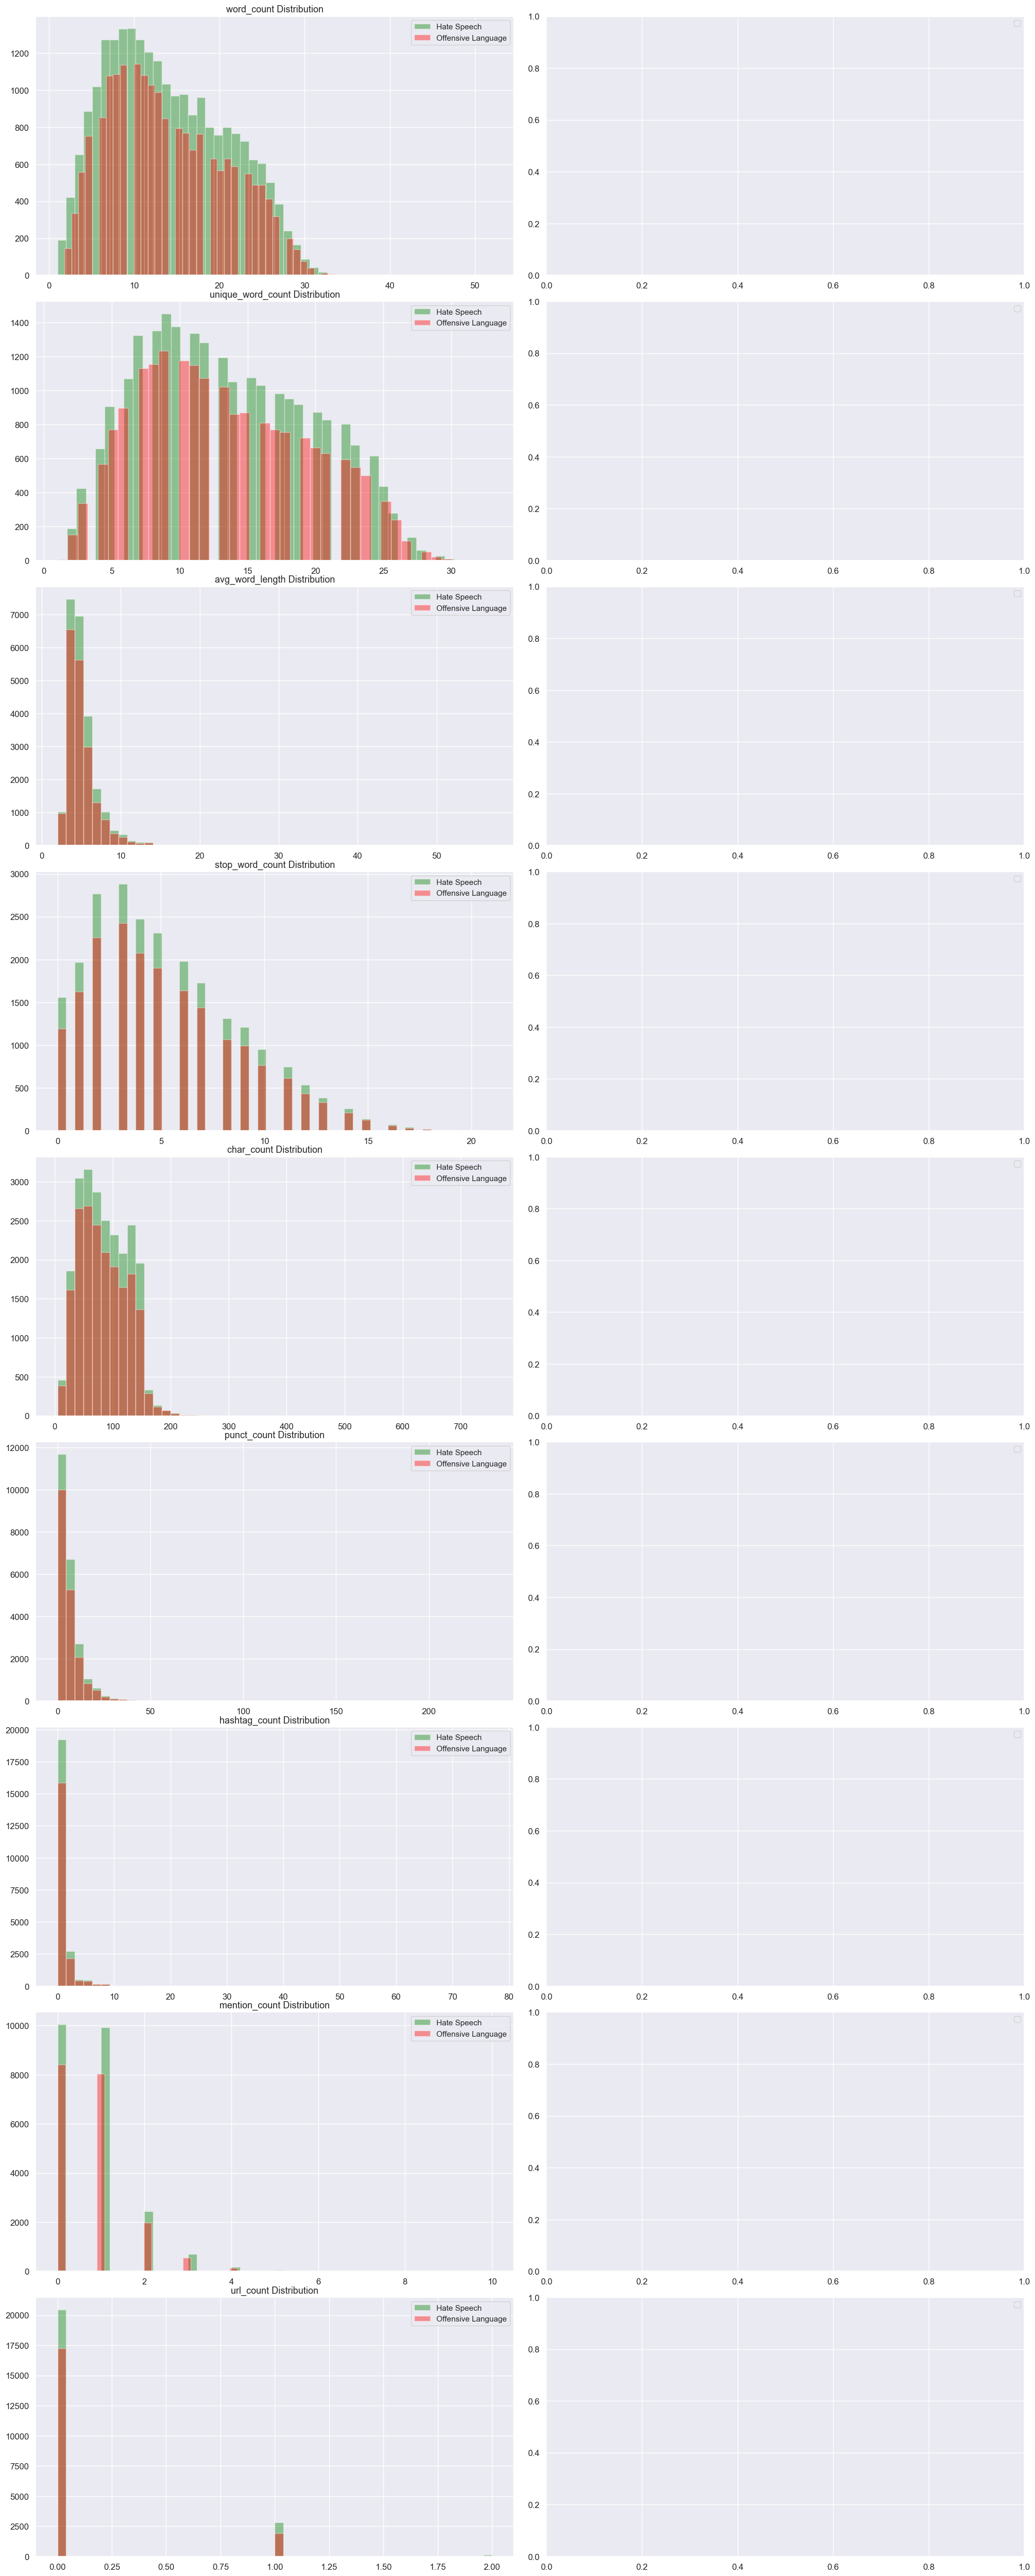

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=len(meta_features), figsize=(20, 50), dpi=100)
plt.tight_layout()

for i, feature in enumerate(meta_features):
    sns.distplot(df2.loc[~hate_speech][feature],kde=False, label='Hate Speech', ax=axes[i][0], color='green')
    sns.distplot(df2.loc[offensive_language][feature],kde=False, label='Offensive Language', ax=axes[i][0], color='red')
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Distribution', fontsize=13)

plt.show()

## N-grams Analysis

In [27]:
def ngrams_generator(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

### Unigrams

In [28]:
offensive_unigrams = defaultdict(int)
hate_unigrams = defaultdict(int)
neither_unigrams = defaultdict(int)

for tweet in df2[offensive_language]['tweet']:
    for word in ngrams_generator(tweet):
        offensive_unigrams[word] += 1
        
for tweet in df2[hate_speech]['tweet']:
    for word in ngrams_generator(tweet):
        hate_unigrams[word] += 1
        
for tweet in df2[neither]['tweet']:
    for word in ngrams_generator(tweet):
        neither_unigrams[word] += 1
        
offensive_unigrams_DF = pd.DataFrame(sorted(offensive_unigrams.items(), key=lambda x: x[1])[::-1])
hate_unigrams_DF = pd.DataFrame(sorted(hate_unigrams.items(), key=lambda x: x[1])[::-1])
neither_unigrams_DF = pd.DataFrame(sorted(neither_unigrams.items(), key=lambda x: x[1])[::-1])

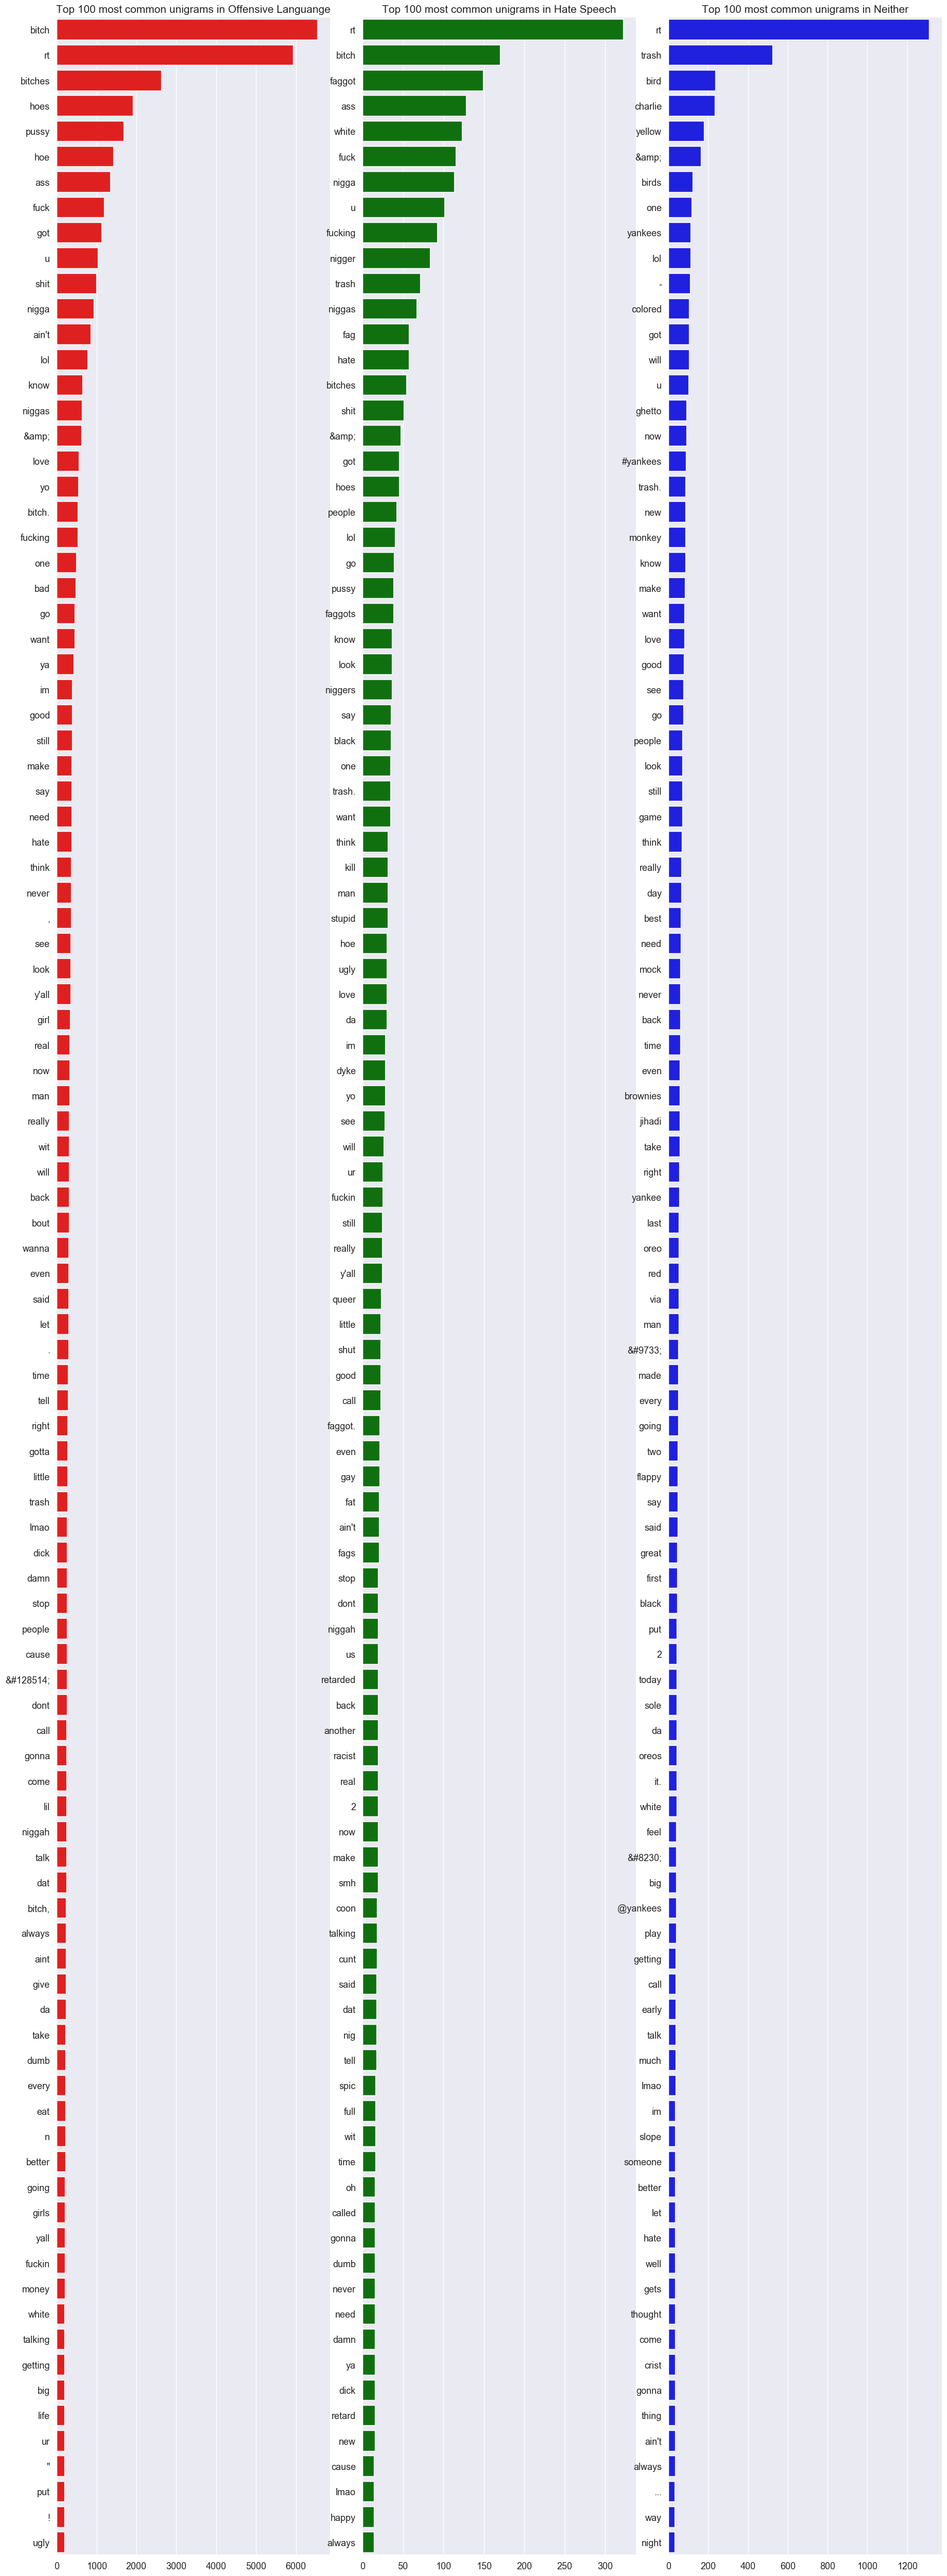

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y= offensive_unigrams_DF[0].values[:N], x= offensive_unigrams_DF[1].values[:N], ax=axes[0], color='red')
sns.barplot(y= hate_unigrams_DF[0].values[:N], x= hate_unigrams_DF[1].values[:N], ax=axes[1], color='green')
sns.barplot(y= neither_unigrams_DF[0].values[:N], x= neither_unigrams_DF[1].values[:N], ax=axes[2], color='blue')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Offensive Languange', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Hate Speech', fontsize=15)
axes[2].set_title(f'Top {N} most common unigrams in Neither', fontsize=15)

plt.show()

### Bigrams

In [30]:
offensive_bigrams = defaultdict(int)
hate_bigrams = defaultdict(int)
neither_bigrams = defaultdict(int)

for tweet in df2[offensive_language]['tweet']:
    for word in ngrams_generator(tweet, n_gram=2):
        offensive_bigrams[word] += 1
        
for tweet in df2[hate_speech]['tweet']:
    for word in ngrams_generator(tweet, n_gram=2):
        hate_bigrams[word] += 1
        
for tweet in df2[neither]['tweet']:
    for word in ngrams_generator(tweet, n_gram=2):
        neither_bigrams[word] += 1
        
offensive_bigrams_DF = pd.DataFrame(sorted(offensive_bigrams.items(), key=lambda x: x[1])[::-1])
hate_bigrams_DF = pd.DataFrame(sorted(hate_bigrams.items(), key=lambda x: x[1])[::-1])
neither_bigrams_DF = pd.DataFrame(sorted(neither_bigrams.items(), key=lambda x: x[1])[::-1])

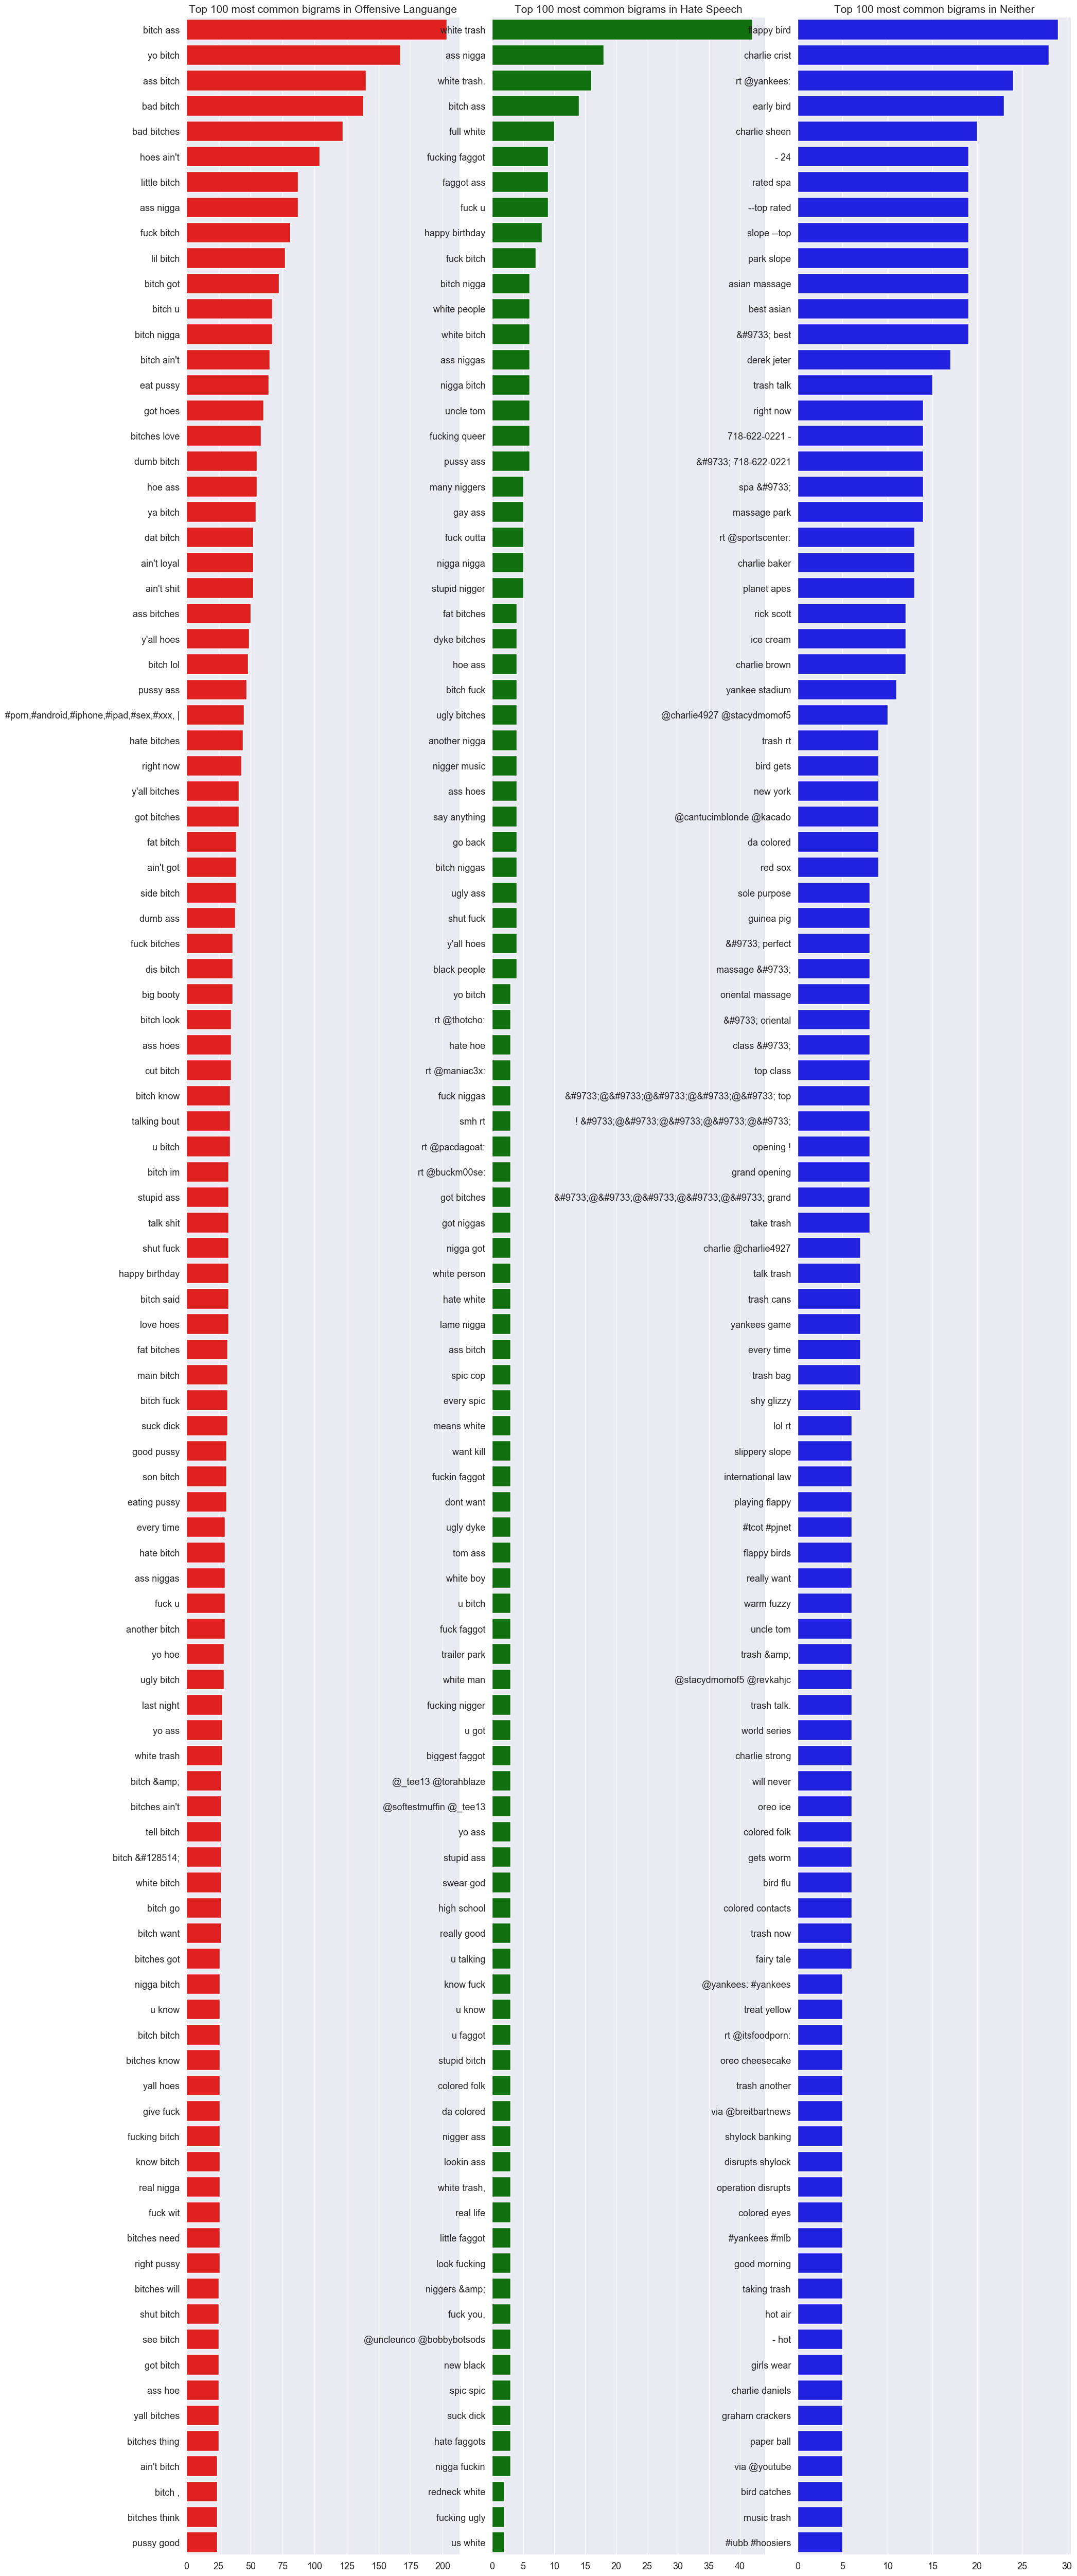

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y= offensive_bigrams_DF[0].values[:N], x= offensive_bigrams_DF[1].values[:N], ax=axes[0], color='red')
sns.barplot(y= hate_bigrams_DF[0].values[:N], x= hate_bigrams_DF[1].values[:N], ax=axes[1], color='green')
sns.barplot(y= neither_bigrams_DF[0].values[:N], x= neither_bigrams_DF[1].values[:N], ax=axes[2], color='blue')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Offensive Languange', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Hate Speech', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in Neither', fontsize=15)

plt.show()

### Trigrams

In [32]:
offensive_trigrams = defaultdict(int)
hate_trigrams = defaultdict(int)
neither_trigrams = defaultdict(int)

for tweet in df2[offensive_language]['tweet']:
    for word in ngrams_generator(tweet, n_gram=3):
        offensive_trigrams[word] += 1
        
for tweet in df2[hate_speech]['tweet']:
    for word in ngrams_generator(tweet, n_gram=3):
        hate_trigrams[word] += 1
        
for tweet in df2[neither]['tweet']:
    for word in ngrams_generator(tweet, n_gram=3):
        neither_trigrams[word] += 1
        
offensive_trigrams_DF = pd.DataFrame(sorted(offensive_trigrams.items(), key=lambda x: x[1])[::-1])
hate_trigrams_DF = pd.DataFrame(sorted(hate_trigrams.items(), key=lambda x: x[1])[::-1])
neither_trigrams_DF = pd.DataFrame(sorted(neither_trigrams.items(), key=lambda x: x[1])[::-1])

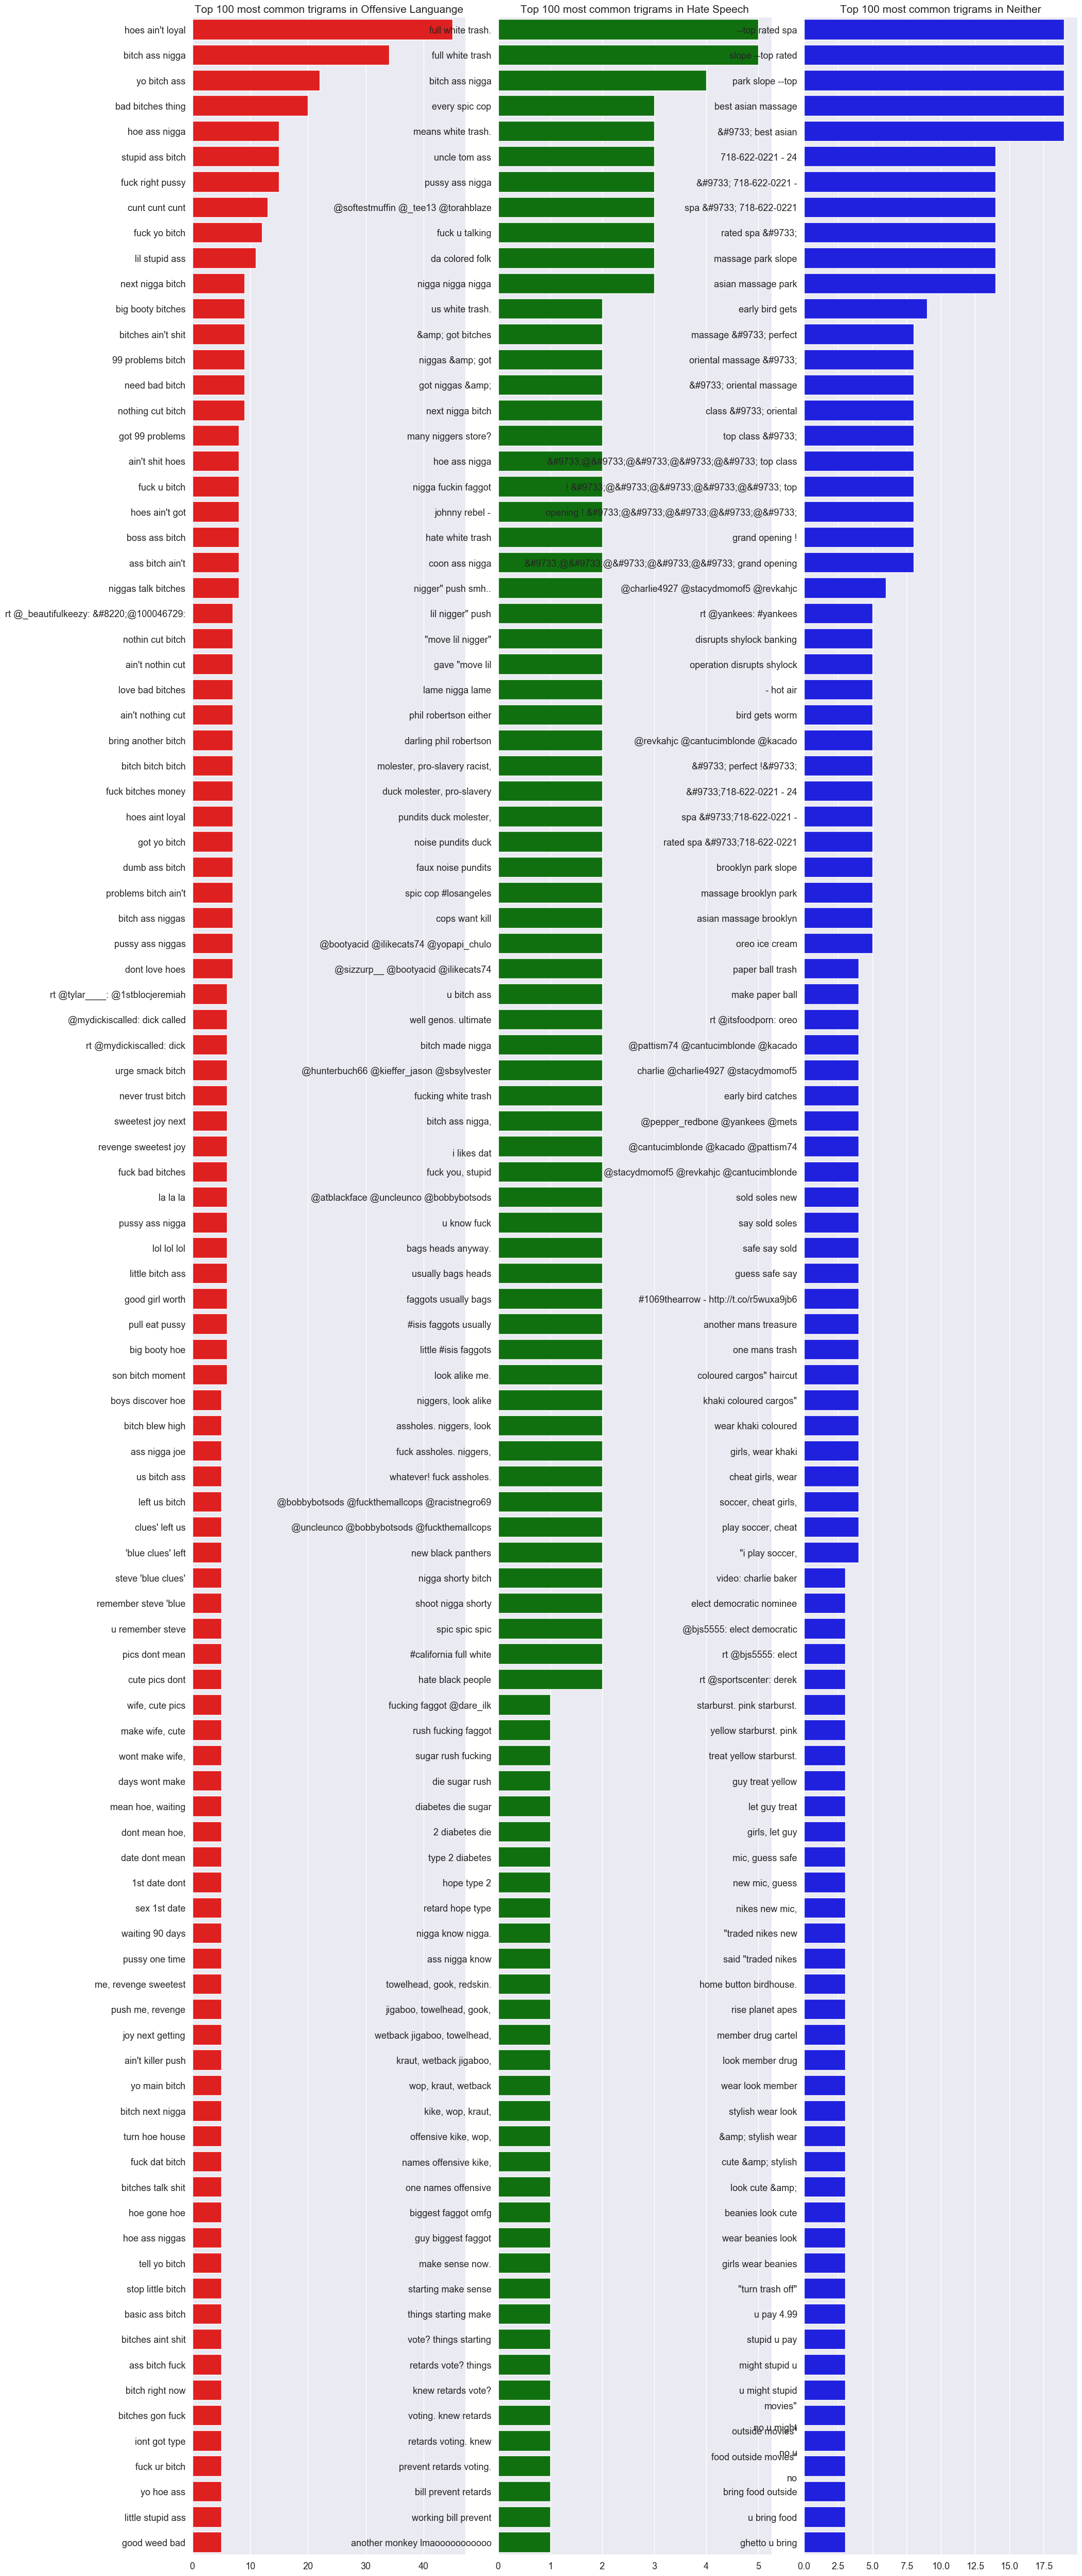

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y= offensive_trigrams_DF[0].values[:N], x= offensive_trigrams_DF[1].values[:N], ax=axes[0], color='red')
sns.barplot(y= hate_trigrams_DF[0].values[:N], x= hate_trigrams_DF[1].values[:N], ax=axes[1], color='green')
sns.barplot(y= neither_trigrams_DF[0].values[:N], x= neither_trigrams_DF[1].values[:N], ax=axes[2], color='blue')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Offensive Languange', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Hate Speech', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in Neither', fontsize=15)

plt.show()

# Text pre-processing & Cleaning

In [34]:
df = pd.read_csv('hate_speech.csv',error_bad_lines=False)

In [35]:
df2= df.copy()

## Removing Punctuations

In [36]:
def punctuation_removal(t):
    punct = str.maketrans('', '', string.punctuation)
    return t.translate(punct)

## Removing Whitespaces

In [37]:
def whitespace_removal(x):
    return ' '.join(x.split())

## Removing Emojis

In [38]:
def emoji_removal(text):
    emoji = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)

## Removing Stop words

In [39]:
stopword = stopwords.words('english')
def stopwords_removal(x):
    words = nltk.word_tokenize(x)
    remove = [word for word in words if word not in stopword]
    return ' '.join(remove)

## Removing URL & HTML

In [40]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    url = re.compile(r"pic.twitter.com\S+")
    return url.sub(r'',text)

In [41]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

## Removing Extras

In [42]:
# Cleaning text some more 
def no_extras(text):
    text = re.sub(r"RT ", " ", text) 
    text = re.sub(r"[^a-zA-Z#@\d\s]", " ", text)
    text = re.sub(r"[0-9]", " ", text) 
    return text 

## Tweet Cleaning

In [43]:
def cleaning(tweet): 
    tweet = remove_URL(tweet)
    tweet = remove_html(tweet)
    tweet = no_extras(tweet)
    tweet = punctuation_removal(tweet)
    tweet = whitespace_removal(tweet)
    tweet = stopwords_removal(tweet)
    tweet = emoji_removal(tweet)
    return tweet

In [44]:
df2['tweet'] = df2['tweet'].apply(lambda x : cleaning(x))

# Modelling

In [45]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))

X_train = count_vectorizer.fit_transform(df2['tweet'])

In [46]:
target = df2['class']

X_learn, X_valid, y_learn, y_valid = train_test_split(X_train,target, test_size=0.2, random_state=40)

## Ensemble Models

In [47]:
models = {}

In [48]:
def run_model(ID, clf, X_train, X_test, y_train, y_test):  
    # Train model
    clf.fit(X_train, y_train)
    
    # Make predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    # Score predictions
    train_score = accuracy_score(y_train, train_predictions)
    test_score = accuracy_score(y_test, test_predictions)
    
    confusion_mtx = confusion_matrix(y_test, test_predictions)
    
    # Save model and results to dictionary
    models[ID] = {"clf": clf,
                  "test_score": test_score, 
                  "train_score": train_score,
                  "confusion_mtx": confusion_mtx,
                  "test_predictions": test_predictions
                 }
    print("Test Score: {}".format(test_score))
    print("Train Score: {}".format(train_score))
    print("Confusion Matrix:\n", confusion_mtx)

### Naive Bayes 

In [49]:
mdl = MultinomialNB()
run_model('Naive_Bayes',mdl, X_learn, X_valid, y_learn, y_valid)

Test Score: 0.8807746620940085
Train Score: 0.968273983657823
Confusion Matrix:
 [[  31  227   34]
 [  33 3714   76]
 [   9  212  621]]


### Stochastic Gradient Descent

In [50]:
count_vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train = count_vectorizer.fit_transform(df2['tweet'])


target = df2['class']

X_learn, X_valid, y_learn, y_valid = train_test_split(X_train,target, test_size=0.2, random_state=40)

mdl = SGDClassifier()
run_model('TF-IDF',mdl, X_learn, X_valid, y_learn, y_valid)

Test Score: 0.8860197700221908
Train Score: 0.9468879249470392
Confusion Matrix:
 [[  13  258   21]
 [   5 3744   74]
 [   0  207  635]]


### Logistic Regression

In [51]:
## Logistic - Tfidf
count_vectorizer = TfidfVectorizer(min_df=2, max_df=0.2)
X_train = count_vectorizer.fit_transform(df2['tweet'])

#We call transform on the test data to create bag of words vectors using the same dictionary

target = df2['class']
X_learn, X_valid, y_learn, y_valid = train_test_split(X_train,target, test_size=0.2, random_state=40)

#Initializing our class and calling fit without training data
mdl = LogisticRegression(C=1,max_iter=1000,penalty='l2')


run_model('LOG',mdl, X_learn, X_valid, y_learn, y_valid)

Test Score: 0.8723017954407908
Train Score: 0.9188943811157066
Confusion Matrix:
 [[  35  240   17]
 [  20 3747   56]
 [   1  299  542]]


In [52]:
mdl = LogisticRegression(C=100, multi_class='auto', random_state=40)
run_model('LogisticRegression', mdl, X_learn, X_valid, y_learn, y_valid)

Test Score: 0.8636271938672584
Train Score: 0.9936447089680218
Confusion Matrix:
 [[  58  210   24]
 [  98 3613  112]
 [   8  224  610]]


### Decision Trees

In [53]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier()
run_model('DecisionTreeClassifier', mdl, X_learn, X_valid, y_learn, y_valid)

Test Score: 0.8624167843453702
Train Score: 0.9986885907394331
Confusion Matrix:
 [[  73  189   30]
 [ 137 3532  154]
 [  25  147  670]]


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

for d in range(10, 26, 5):
    print(d)
    mdl = RandomForestClassifier(max_depth=d, n_estimators=100, random_state=0)
    run_model('RandomForestClassifier_maxDepth{}'.format(d), mdl, X_learn, X_valid, y_learn, y_valid)

10
Test Score: 0.7714343352834375
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  841    1]]
15
Test Score: 0.7730482146459552
Train Score: 0.7757994552607687
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  833    9]]
20
Test Score: 0.7732499495662699
Train Score: 0.7769595480681932
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  832   10]]
25
Test Score: 0.7750655638491023
Train Score: 0.7808937758498941
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  823   19]]


In [55]:
# Max Tunning
for f in range(1, 13, 2):
    print(f)
    mdl = RandomForestClassifier(max_depth=25, max_features=f, n_estimators=100, random_state=0)
    run_model('RandomForestClassifier_maxDepth20_maxFeatures{}'.format(f), mdl, X_learn, X_valid, y_learn, y_valid) 

1
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]
3
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]
5
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]
7
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]
9
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]
11
Test Score: 0.7712326003631229
Train Score: 0.7750933118127711
Confusion Matrix:
 [[   0  292    0]
 [   0 3823    0]
 [   0  842    0]]


### K-Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in [1,3,5]:
    print('n_neighbors:', n_neighbors)
    mdl = KNeighborsClassifier(n_neighbors = n_neighbors)
    run_model('KNN_n{}'.format(n_neighbors), mdl, X_learn, X_valid, y_learn, y_valid)

n_neighbors: 1
Test Score: 0.7829332257413758
Train Score: 0.9982850801977202
Confusion Matrix:
 [[  26  261    5]
 [  54 3719   50]
 [   9  697  136]]
n_neighbors: 3
Test Score: 0.7793019971757111
Train Score: 0.8056592353475235
Confusion Matrix:
 [[  12  279    1]
 [  25 3786   12]
 [   3  774   65]]
n_neighbors: 5
Test Score: 0.777284647972564
Train Score: 0.7880560879652981
Confusion Matrix:
 [[  14  278    0]
 [  16 3803    4]
 [   0  806   36]]


### Support Vector Machine (SVM)

In [57]:
from sklearn.svm import SVC
mdl = SVC()
run_model('SVC_rbf', mdl, X_learn, X_valid, y_learn, y_valid) 

Test Score: 0.8727052652814202
Train Score: 0.9636336124281247
Confusion Matrix:
 [[  18  261   13]
 [  14 3752   57]
 [   0  286  556]]


In [58]:
mdl = SVC(kernel='poly', degree=1)
run_model('SVC_poly3', mdl, X_learn, X_valid, y_learn, y_valid) 

Test Score: 0.8908614081097438
Train Score: 0.9360940179562192
Confusion Matrix:
 [[  32  238   22]
 [  21 3727   75]
 [   3  182  657]]


## Model Scores Data frame

In [59]:
pd.DataFrame(models).transpose()[['test_score', 'train_score', 'clf']].sort_values('test_score', ascending=False)

,test_score,train_score,clf
SVC_poly3,0.890861,0.936094,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
TF-IDF,0.88602,0.946888,"SGDClassifier(alpha=0.0001, average=False, cla..."
Naive_Bayes,0.880775,0.968274,"MultinomialNB(alpha=1.0, class_prior=None, fit..."
SVC_rbf,0.872705,0.963634,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
LOG,0.872302,0.918894,"LogisticRegression(C=1, class_weight=None, dua..."
LogisticRegression,0.863627,0.993645,"LogisticRegression(C=100, class_weight=None, d..."
DecisionTreeClassifier,0.862417,0.998689,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
KNN_n1,0.782933,0.998285,"KNeighborsClassifier(algorithm='auto', leaf_si..."
KNN_n3,0.779302,0.805659,"KNeighborsClassifier(algorithm='auto', leaf_si..."
KNN_n5,0.777285,0.788056,"KNeighborsClassifier(algorithm='auto', leaf_si..."
